In [1]:
import qiskit_quantum_knn
from qiskit_quantum_knn.qknn import QKNeighborsClassifier
from qiskit_quantum_knn.encoding import analog
from qiskit import aqua
from sklearn import datasets
import qiskit as qk
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [2]:
iris = datasets.load_iris()
#iris = np.random.shuffle(iris)
labels = iris.target
data_raw = iris.data

In [3]:
n_variables = 2        # should be positive power of 2
n_train_points = 32     # can be any positive integer
n_test_points = 16      # can be any positive integer

In [4]:
encoded_data = analog.encode(data_raw[:, :n_variables])

# now pick these indices from the data
train_data = encoded_data[:n_train_points]
train_labels = labels[:n_train_points]

test_data = encoded_data[n_train_points:(n_train_points+n_test_points), :n_variables]
test_labels = labels[n_train_points:(n_train_points+n_test_points)]


# Quantum Nearest Neighbor Implementation

In [5]:

# initialising the quantum instance
backend = qk.BasicAer.get_backend('qasm_simulator')
instance = aqua.QuantumInstance(backend, shots=10000)

# initialising the qknn model
qknn = QKNeighborsClassifier(
   n_neighbors=3,
   quantum_instance=instance)


qknn.fit(train_data, train_labels)
qknn_prediction = qknn.predict(test_data)

print(qknn_prediction)
print(test_labels)

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\quantum_instance.py:137: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit-terra')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


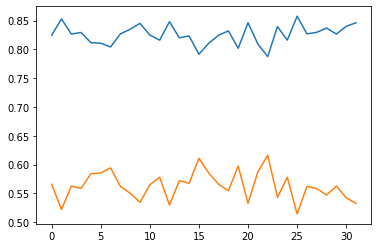

In [6]:
plt.plot(train_data)

# Classical Nearest Neighbor Implementation

In [7]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_data,train_labels)
clf_prediction = clf.predict(test_data)
print('prediction: ',clf_prediction)
print('ground_truth: ',test_labels)

prediction:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
ground_truth:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
